#  This Jupyter Notebook contains the codes of various Euler Bernoulli Beam simulations


## Constants definitions

In [1]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)

## Left fixed right free

In [13]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.
A = [];

n = 100; % number of subintervals on [h, L]
h = L/n; % discretization spacing
N = n; % number of unknowns to be solved for

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
%f(1) = f(N) = 0;

% left end point
A(1,1) = 12;
A(1,2) = -9;
A(1,3) = (8/3);
A(1,4) = (-1/4);

% right endpoint
A(N,N) = (72/17);
A(N-1,N) = (-28/17);
A(N,N-1) = (-156/17);
A(N-1,N-1) = (72/17);
A(N-1,N-2) = (-60/17);
A(N,N-2) = (96/17);
A(N,N-3) = (-12/17);
A(N-1,N-3) = (16/17);


% Creating diagonals of the matrix
for i=1:N
    for j = 1:N
        % adding the main diagonal
        if i == j && i > 1 && i <= N - 2
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= N - 2
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= N - 2
            A(i,j) = 1;
        endif
    endfor
endfor

% Compressing the matrix into a sparse matrix
A = sparse(A);

% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =  0.183591344127596


error: 'x' undefined near line 1 column 6
error: evaluating argument list element number 1
error: 'x' undefined near line 1 column 6
error: evaluating argument list element number 1


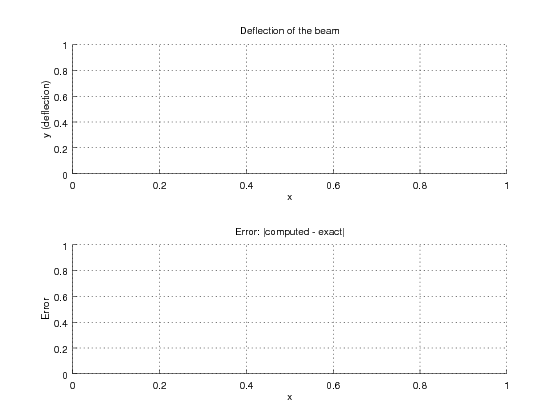

In [1]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

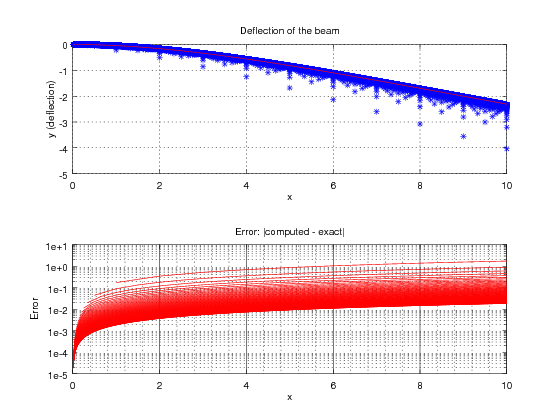

In [16]:

% vector that contains error values
ErrorsLeftFixedRightFree = [];
n = 10; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n;

for k=1:100 
    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);
    %f(1) = f(N) = 0;
    % Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
    % Filling and solving our matrix.
    format long
    A = [];

    % left end point
    A(1,1) = 12;
    A(1,2) = -9;
    A(1,3) = (8/3);
    A(1,4) = (-1/4);


    % right endpoint
    A(N,N) = (72/17);
    A(N-1,N) = (-28/17);
    A(N,N-1) = (-156/17);
    A(N-1,N-1) = (72/17);
    A(N-1,N-2) = (-60/17);
    A(N,N-2) = (96/17);
    A(N,N-3) = (-12/17);
    A(N-1,N-3) = (16/17);


    % Creating diagonals of the matrix
    for i=1:N
        for j = 1:N
            % adding the main diagonal
            if i == j && i > 1 && i <= N - 2
                A(i,j) = 6;
            endif
            % adding the first superdiagonal and subdiagonal
            if abs(i - j) == 1 && i > 1 && i <= N - 2
                A(i,j) = -4;
            endif
            % adding the second superdiagonal and subdiagonal
            if abs(i - j) == 2 && i > 1 && i <= N - 2
                A(i,j) = 1;
            endif
        endfor
    endfor


    % Compressing the matrix into a sparse matrix
    A = sparse(A);

    % Finding y
    y = A\f;

    % Plots

    x = (h:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
    ErrorsLeftFixedRightFree(k) = max(abs(y-y_exact));
    n = n + 10;
    h = L/n; % discretization spacing
    N = n;     
    
    subplot(2,1,1);
    plot(x, y, "b*", x, y_exact, "r")
    hold on
    title('Deflection of the beam');
    xlabel('x'); ylabel('y (deflection)');
    grid on;
    subplot(2,1,2);
    semilogy(x, abs(y - y_exact), "r")
    hold on
    title('Error: |computed - exact|');
    xlabel('x'); ylabel('Error');
    grid on;
endfor

ErrorsLeftFixedRightFree = ErrorsLeftFixedRightFree';


# Error Analysis

## Both ends fixed

In [8]:
x = (0:1:10)';
FixedErrorDiff = [];



x =

    0
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10



In [17]:
ErrorsLeftFixedRightFree

ErrorsLeftFixedRightFree =

   1.7280707399995419
   0.8936836424912222
   0.6024916866464776
   0.4543982802202202
   0.3647368985254325
   0.3046256605676883
   0.2615235599912826
   0.2291063036764935
   0.2038390694634011
   0.1835913441275960
   0.1670025660609014
   0.1531631335999566
   0.1414418671225284
   0.1313870557123944
   0.1226668959912285
   0.1150321927174760
   0.1082921569060091
   0.1022982414797005
   0.0969330298911584
   0.0921025393218269
   0.0877306401371780
   0.0837549756916953
   0.0801240110756183
   0.0767948040518238
   0.0737312011166757
   0.0709026591582282
   0.0682831227770557
   0.0658502349784240
   0.0635847706349209
   0.0614699928912064
   0.0594913715873080
   0.0576360985201227
   0.0558930802728570
   0.0542523973243965
   0.0527053187723578
   0.0512439964113756
   0.0498615061547421
   0.0485516571907727
   0.0473088749030559
   0.0461281127307229
   0.0450049289270864
   0.0439351073932204
   0.0429149642383444
   0.0419409350946478
   0